In [1]:
import pandas as pd

data = pd.read_csv("ads.csv")

In [2]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
X=data.iloc[:,[2,3]].values#independent variables

y=data.iloc[:,4].values#dependent variables

In [4]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.preprocessing import StandardScaler#StandardScaler is a class

sc_x=StandardScaler()

X_train=sc_x.fit_transform(X_train)#age is in 2 digits and salary is a 6digit no. therefore, we scale them to compare efficiently

#fit-->creating an object model for fitting your data wheras the tansform is going to transform the data to the object you have created.

X_test=sc_x.transform(X_test)

In [6]:
from sklearn.naive_bayes import GaussianNB #GaussianNB Class Name

classifier=GaussianNB()

classifier.fit(X_train,y_train)#fit is the method which is fitting the training data according to the KNN classifier
y_pred=classifier.predict(X_test)
#transform() applied upon model to generate transformed data set

 #it is the predicted values of X_test

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[65  3]
 [ 7 25]]


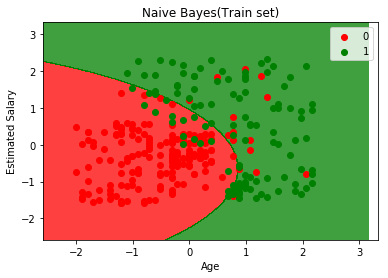

In [10]:
#Visualizing the Training Data
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap



#Visualizing the Test Data

X_set, y_set = X_train,y_train # can use X_train and y_train also

X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step=0.01), np.arange(start = X_set[:,1].min() -1 , stop=X_set[:,1].max() + 1, step=0.01))



plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))



plt.xlim(X1.min(), X1.max())

plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)

plt.title('Naive Bayes(Train set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()


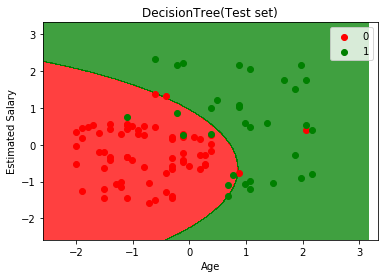

In [11]:
#Visualizing the Training Data
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap



#Visualizing the Test Data

X_set, y_set = X_test,y_test # can use X_train and y_train also

X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step=0.01), np.arange(start = X_set[:,1].min() -1 , stop=X_set[:,1].max() + 1, step=0.01))



plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))



plt.xlim(X1.min(), X1.max())

plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)

plt.title('DecisionTree(Test set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()
